<a href="https://colab.research.google.com/github/LOWERCAS3/PyTorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network classfication with PyTorch
Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

Doc: https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make classification data and get it ready    

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Making 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.02,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.76026594  0.22387823]
 [-0.76722217  0.1455425 ]
 [-0.80815854  0.14894355]
 [-0.3760283   0.70320906]
 [ 0.44051035 -0.89761737]]
First 5 samples of y: 
[1 1 1 1 0]


In [ ]:
 #Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
5,-0.484527,0.660633,1
6,-0.012450,0.802211,1
7,0.777458,0.141876,1
8,-0.166138,-0.790265,1
9,-0.126921,1.011160,0


These types of data set as also known as toy dataset, Dataset that is small enough to experiment but sizeble enough to practice fundamentals

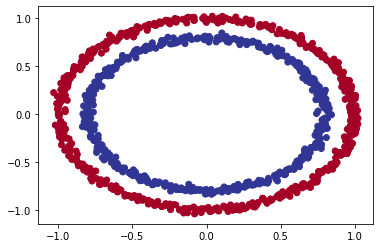

In [ ]:
# Visualizing the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
             y=X[:, 1],
             c=y,
             cmap=plt.cm.RdYlBu)

### 1.1 Check shapes of inputs and outputs
Since we are working with tensors its good practice to check shapes of input and outputs before starting to work with datat in order to get rid of shape errors that could prop up in future

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
# Viewing the first feature and label
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and same for y: {y_sample.shape}")

Values for one sample of X: [0.76026594 0.22387823] and same for y: 1
Shape for one sample of X: (2,) and same for y: ()


### 1.2 Turn data into tensors and creating train and test splits

In [ ]:
import torch
torch.__version__

'1.12.1+cu113'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Splitting data into training and testing splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,# <- 80/20 split
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model
Building model to classify red and blue dots

Steps to do:
1. Setup device agnostic code so our code will run on an accelerator (GPU if available)
2. Constuct a model by subclassing `nn.Module`
3. Define loss and optimizer
4. Creating training and testing loops

In [ ]:
# Importing PyTorch and nn
import torch
from torch import nn

# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Create a model:


1.   Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2.   Create 2 `nn.Linear()` layers athat are capable of handling the shapes of our data.
3.   Define a `forward()` method that outines that forward pass(or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`.



In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5)# <- takes in 2 features and upscale to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1)# <- takes in 5 features from previous layer and outputs a single feature (same shape as y)

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x))
    
# 4. Instantiate the instance of out model class and send it to target device  
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
 # Another way of creating PyTorch model above
model_0 = nn.Sequential(
     nn.Linear(in_features=2, out_features=5),
     nn.Linear(in_features=5, out_features=1)
 ).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.1144, -0.2031],
                      [ 0.3190, -0.4988],
                      [-0.4469, -0.0304],
                      [ 0.2013, -0.3769],
                      [ 0.2083,  0.0273]])),
             ('0.bias', tensor([ 0.6564,  0.6700, -0.4145, -0.0769, -0.5119])),
             ('1.weight',
              tensor([[ 0.3358,  0.3810,  0.0039, -0.0828,  0.3459]])),
             ('1.bias', tensor([0.3773]))])

In [ ]:
# Make predictions

with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of Samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of Samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss functions and optimizer

Which loss functions and optimizer to use?

- This is specific to problem



In [ ]:
from torch.nn.modules.loss import BCEWithLogitsLoss
# Setup the loss function
# loss_fn = BCELoss() # BCELoss -> requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn  = nn.BCEWithLogitsLoss() #  BCEWithLogitsLoss -> sigmoid activation function is already built-in

optimizer = torch.optim.SGD(  params=model_0.parameters(),
                            lr=0.01)

In [ ]:
# Calculate the accuracy -> out of 100 samples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

## 3. Training the model

To train our model we're going to build a training loop

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> predictions probabilites -> predictions labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into **predictions probabilities** by passing them to some kind of activation function (e.g. sigmoid function for binary crossentropy classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.


In [ ]:
# View 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.4789],
        [0.4680],
        [0.6531],
        [0.4308],
        [0.8939]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid functions on our model logits to turn them into predictions probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6175],
        [0.6149],
        [0.6577],
        [0.6061],
        [0.7097]])

For our prediction probability values, we need to perform a **range-style** rounding on them:

* `y_pred_probs` >= 0.5, `y = 1` (class 1)
* `y_pred_probs` < 0.5, `y = 0` (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pre labels) in single line
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check the equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    # loss = loss_fn(torch.sigmoid(y_logits),
    #                              y_train) # If we use BCELoss it will expect prediction probability as input hence we are passing logits to sigmoid function to get prediction probability
    loss = loss_fn(y_logits,
                   y_train) # Since we are using BCEWithLogitsLoss it expects raw logits as input
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Back Propagation
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
        # 3. Priniting results
        if epoch % 10 == 0:
            print(f"Epoch : {epoch} | Loss : {loss:.5f} | Acc : {acc:.2f}% | Test Loss : {test_loss:.5f} | Test Acc : {test_acc:.2f}% ")

Epoch : 0 | Loss : 0.75441 | Acc : 50.00% | Test Loss : 0.74684 | Test Acc : 50.00% 
Epoch : 10 | Loss : 0.74708 | Acc : 50.00% | Test Loss : 0.74007 | Test Acc : 50.00% 
Epoch : 20 | Loss : 0.74063 | Acc : 50.00% | Test Loss : 0.73413 | Test Acc : 50.00% 
Epoch : 30 | Loss : 0.73496 | Acc : 50.00% | Test Loss : 0.72893 | Test Acc : 50.00% 
Epoch : 40 | Loss : 0.72997 | Acc : 50.00% | Test Loss : 0.72436 | Test Acc : 50.00% 
Epoch : 50 | Loss : 0.72559 | Acc : 50.00% | Test Loss : 0.72037 | Test Acc : 50.00% 
Epoch : 60 | Loss : 0.72173 | Acc : 50.00% | Test Loss : 0.71686 | Test Acc : 50.00% 
Epoch : 70 | Loss : 0.71835 | Acc : 50.00% | Test Loss : 0.71380 | Test Acc : 50.00% 
Epoch : 80 | Loss : 0.71537 | Acc : 50.00% | Test Loss : 0.71111 | Test Acc : 50.00% 
Epoch : 90 | Loss : 0.71275 | Acc : 50.00% | Test Loss : 0.70876 | Test Acc : 50.00% 
Epoch : 100 | Loss : 0.71044 | Acc : 50.00% | Test Loss : 0.70670 | Test Acc : 50.00% 
Epoch : 110 | Loss : 0.70842 | Acc : 50.00% | Test Los

## 4. Make predictions and evaluate the models

From metrics it looks like our model is not learning anything....

So to inspect it lets make some predictions and make them visual!

To so do we're going to import custom functions for visualizations:- https://raw.githubusercontent.com/LOWERCAS3/PyTorch/main/helper_functions.py


In [ ]:
import requests
from pathlib import Path

# Download helper functions from PyTorch repo (if is not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/LOWERCAS3/PyTorch/main/helper_functions.py")
    with open("helper_functions.py", "wb")  as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

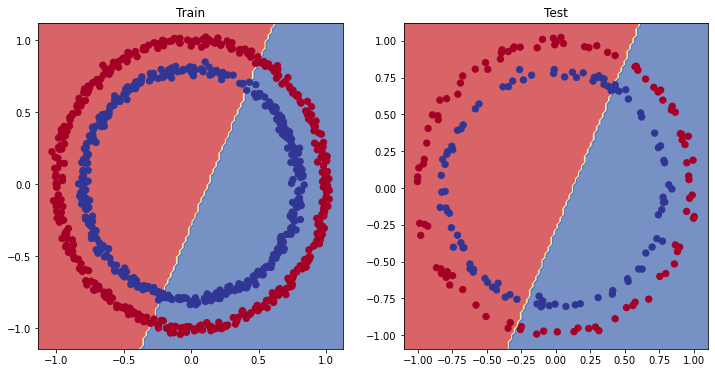

In [ ]:
# Plot decision bounday of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

from numpy.random.mtrand import random_integers
## 5. Improving a model (from model perspective)

* Add More Layers - Give the model more chances to learn about the patterns in the data
* Add More Hidden Units - go from 5 hidden units 10 hidden units
* fit for longer - Increase the epochs
* Changing the activation functions
* Changing the learning rate
* Changing the loss functions

These options are all from model's perspective because they deals directly with model rather than data.

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_3(self.layer_2(self.layer_1(x)))
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                        lr=0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred prob -> preds

    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. back pass (Backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate the loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # Print the results
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69397 | Acc: 50.75% | Test loss: 0.69260 | Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.50% | Test loss: 0.69379 | Test Acc: 47.00%
Epoch: 200 | Loss: 0.69298 | Acc: 51.12% | Test loss: 0.69438 | Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.12% | Test loss: 0.69458 | Test Acc: 46.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.25% | Test loss: 0.69465 | Test Acc: 45.50%
Epoch: 500 | Loss: 0.69298 | Acc: 51.25% | Test loss: 0.69467 | Test Acc: 45.50%
Epoch: 600 | Loss: 0.69298 | Acc: 51.25% | Test loss: 0.69468 | Test Acc: 45.50%
Epoch: 700 | Loss: 0.69298 | Acc: 51.25% | Test loss: 0.69469 | Test Acc: 45.50%
Epoch: 800 | Loss: 0.69298 | Acc: 51.25% | Test loss: 0.69469 | Test Acc: 45.50%
Epoch: 900 | Loss: 0.69298 | Acc: 51.25% | Test loss: 0.69469 | Test Acc: 45.50%


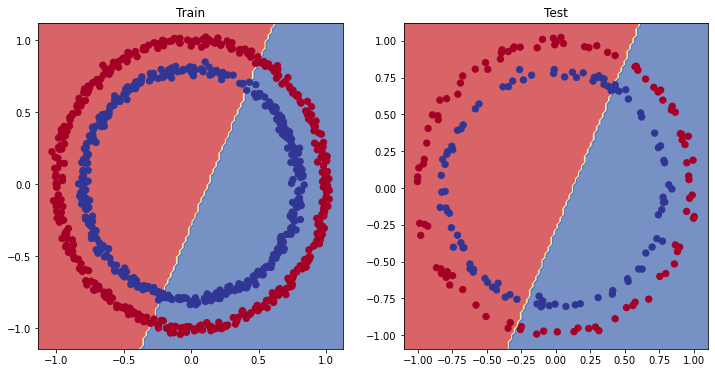

In [ ]:
# Plot decision bounday of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way ot troubleshoot to a larger problem is to test out a smaller problem
 

In [ ]:
# Create some linear data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test split
from sklearn.model_selection import train_test_split

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression,
                                                                                                y_regression,
                                                                                                test_size=0.2,
                                                                                                random_state=42)

# Check the lengths of each
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

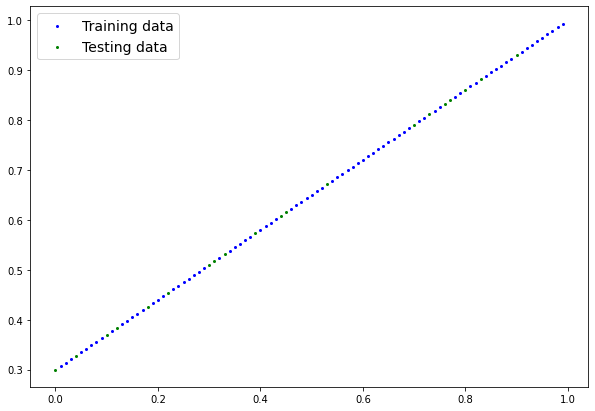

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 10000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    # Training
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    
    # Print results
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f} ")

Epoch: 0 | Loss: 0.80353 | Test loss: 0.77528 
Epoch: 1000 | Loss: 0.00141 | Test loss: 0.00253 
Epoch: 2000 | Loss: 0.00154 | Test loss: 0.00233 
Epoch: 3000 | Loss: 0.00155 | Test loss: 0.00231 
Epoch: 4000 | Loss: 0.00156 | Test loss: 0.00230 
Epoch: 5000 | Loss: 0.00155 | Test loss: 0.00230 
Epoch: 6000 | Loss: 0.00154 | Test loss: 0.00229 
Epoch: 7000 | Loss: 0.00154 | Test loss: 0.00228 
Epoch: 8000 | Loss: 0.00158 | Test loss: 0.00223 
Epoch: 9000 | Loss: 0.00151 | Test loss: 0.00229 


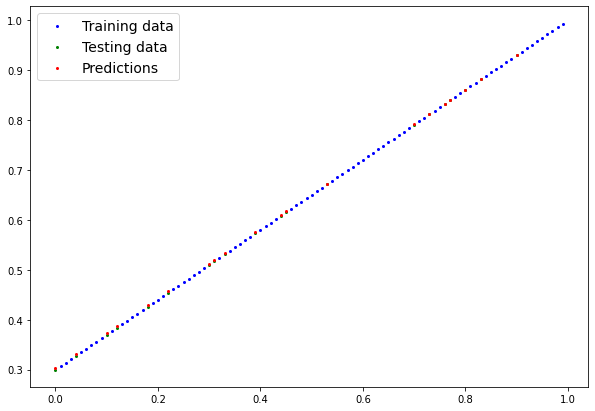

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing piece: non-linearity

Combining linearity and non-linearity


### 6.1 Recreating non-Linear data 

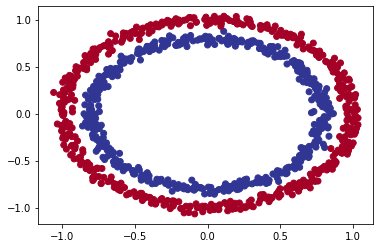

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split data sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

### 6.2 Build a model with non-linearity

Artificial neural networks are large combination of linear and non linear functions which are potentially able to find patterns in data.


In [ ]:
# Building a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # ReLU is a non_linear activation funtion
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        # Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### 6.4 Training a model with non-linearity

In [ ]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Set up no. of epochs
epochs = 2000

for epoch in range(epochs):
    ### Training
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> prediction probabilities -> predictions
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295 | Acc: 50.00% | Test loss: 0.69319 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.69115 | Acc: 52.88% | Test loss: 0.69102 | Test Acc: 52.50%
Epoch: 200 | Loss: 0.68977 | Acc: 53.37% | Test loss: 0.68940 | Test Acc: 55.00%
Epoch: 300 | Loss: 0.68795 | Acc: 53.00% | Test loss: 0.68723 | Test Acc: 56.00%
Epoch: 400 | Loss: 0.68517 | Acc: 52.75% | Test loss: 0.68411 | Test Acc: 56.50%
Epoch: 500 | Loss: 0.68102 | Acc: 52.75% | Test loss: 0.67941 | Test Acc: 56.50%
Epoch: 600 | Loss: 0.67515 | Acc: 54.50% | Test loss: 0.67285 | Test Acc: 56.00%
Epoch: 700 | Loss: 0.66659 | Acc: 58.38% | Test loss: 0.66322 | Test Acc: 59.00%
Epoch: 800 | Loss: 0.65160 | Acc: 64.00% | Test loss: 0.64757 | Test Acc: 67.50%
Epoch: 900 | Loss: 0.62362 | Acc: 74.00% | Test loss: 0.62145 | Test Acc: 79.00%
Epoch: 1000 | Loss: 0.56818 | Acc: 87.75% | Test loss: 0.57378 | Test Acc: 86.50%
Epoch: 1100 | Loss: 0.48153 | Acc: 93.50% | Test loss: 0.49935 | Test Acc: 90.50%
Epoch: 1200 | Loss: 0.37056 

### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

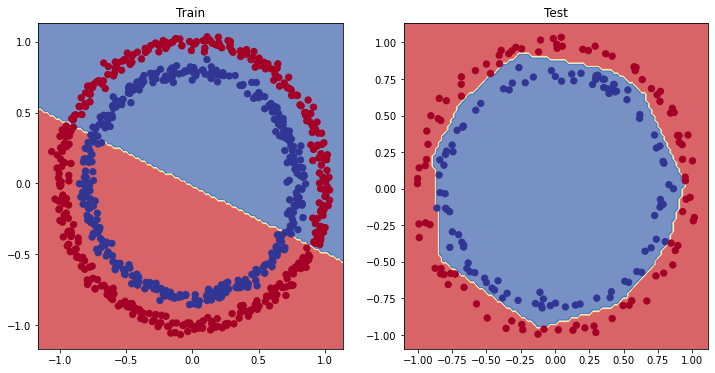

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)



## 7. Replicating non-linear functions manually
Neural networks, rather than us telling the model what to learn, we give it the tools to discver patterns in data and it tries to figure out the patterns on its own.

And these tools are linear and non-linear funtions.

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

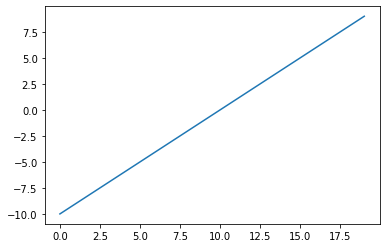

In [ ]:
# Visualize the tensor
plt.plot(A)

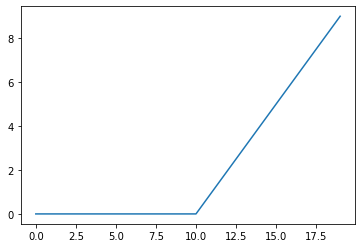

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.max(torch.tensor(0), x)

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

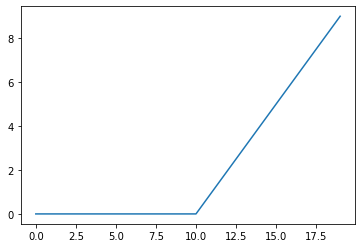

In [ ]:
plt.plot(relu(A))

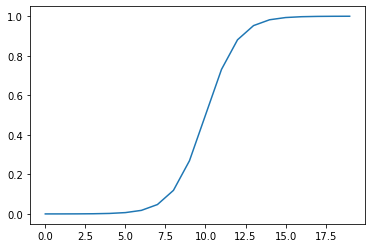

In [ ]:
plt.plot(torch.sigmoid(A))

In [61]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-x))

## 8. Putting it all together with a multi-class classification problem

* Binary classification -> one thing or another (cat vs dog, spam vs not spam, fraud vs not fraud)
* Multi-class classification -> more than one thing or another (cat vs dog vs chicken)

### 8.1 Creating a toy multiclass dependencies

In [127]:
# Importing dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split
from torch import nn

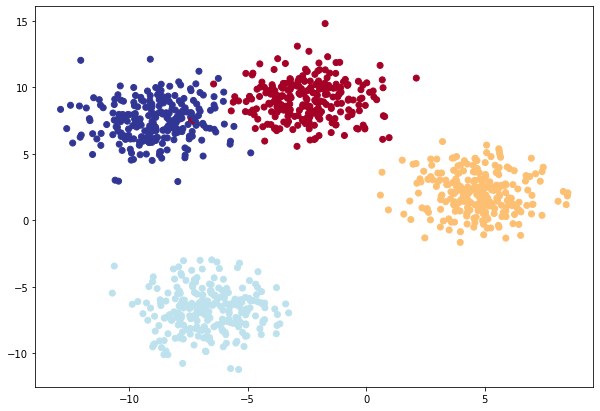

In [128]:
# Set the hyperparamaters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters some ambiguity
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [129]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [130]:
# Building a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification

        Args:
            input_features (int) : Number of input features of the model
            output_features (int) : Number of output features (number of output classes)
            hidden_units (int) : Number of hidden units between layers , default 8

        Returns :

        Example: 
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
    )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer_stack(x)
    
# Create instance of BlobModel and send it to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [131]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [132]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer  for our multi-class model

In [133]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-classs classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class classification PyTorch model

In order to evaluate and  train and test out model we need to convert out model's outputs (logits) to predictions probabilites and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> prob labels (take the argmax of the pred probs)

In [134]:
# Evaluating raw outputs (logits) of our model
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [135]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [136]:
# Convert our model's logit outputs to prediction probabitlites
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [137]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [138]:
torch.argmax(y_pred_probs[0])

tensor(3)

In [139]:
# Convert model's prediction probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [140]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Create a training loop and testing loop for a multi-class PyTorch model

In [141]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put the data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop throught the data
for epoch in range(epochs):
    ### Training 
    model_4.train()
    
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                               y_pred=test_preds)
        
    # Printing results
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.0432 | Acc: 65.50% | Test Loss: 0.57861 | Test Acc: 95.50%
Epoch: 10 | Loss: 0.1440 | Acc: 99.12% | Test Loss: 0.13037 | Test Acc: 99.00%
Epoch: 20 | Loss: 0.0806 | Acc: 99.12% | Test Loss: 0.07216 | Test Acc: 99.50%
Epoch: 30 | Loss: 0.0592 | Acc: 99.12% | Test Loss: 0.05133 | Test Acc: 99.50%
Epoch: 40 | Loss: 0.0489 | Acc: 99.00% | Test Loss: 0.04098 | Test Acc: 99.50%
Epoch: 50 | Loss: 0.0429 | Acc: 99.00% | Test Loss: 0.03486 | Test Acc: 99.50%
Epoch: 60 | Loss: 0.0391 | Acc: 99.00% | Test Loss: 0.03083 | Test Acc: 99.50%
Epoch: 70 | Loss: 0.0364 | Acc: 99.00% | Test Loss: 0.02799 | Test Acc: 99.50%
Epoch: 80 | Loss: 0.0345 | Acc: 99.00% | Test Loss: 0.02587 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.0330 | Acc: 99.12% | Test Loss: 0.02423 | Test Acc: 99.50%


### 8.6 Making and evaluating predictions with Pytorch multi-class model

In [142]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [143]:
# Go from logits -> Prediction Probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4287e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0767e-09, 2.0006e-04]])

In [144]:
# Go from pred probs to pred
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [145]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

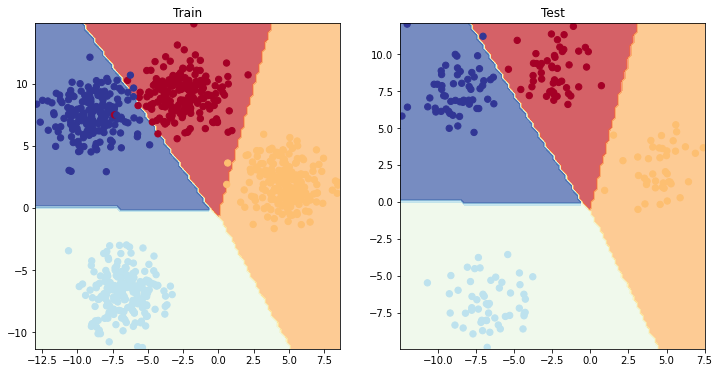

In [146]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model got right?
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report


In [147]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 5.4 MB/s 


In [149]:
import torchmetrics
from torchmetrics import Accuracy

# Setup metric
torchmetrics_accuracy = Accuracy().to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)